<a href="https://colab.research.google.com/github/drcruzm/orange/blob/main/regresionExamenok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np

n_samples = 500
ventas_previas = np.random.randint(5, 500, n_samples)
gasto_publicidad = np.random.uniform(100, 250, n_samples)
temp_media = np.random.uniform(-10, 20, n_samples)
dias_hasta_navidad = np.random.randint(30, 90, n_samples)
competencia = np.random.uniform(1, 10, n_samples)
noise = np.random.normal(0, 150, n_samples)
inventario_necesario = (1.5 * ventas_previas +
                        100 * gasto_publicidad -
                        80 * temp_media -
                        50 * dias_hasta_navidad -
                        120 * competencia +
                        noise)
inventario_necesario = np.maximum(0, inventario_necesario).astype(int)
#
 #                  Coeficiente  Importancia
# competencia         -120.230100   120.230100
# gasto_publicidad      99.905256    99.905256
# temp_media           -79.809183    79.809183
# dias_hasta_navidad   -49.433285    49.433285
# ventas_previas         1.536426     1.536426
#

df = pd.DataFrame({
    'ventas_previas': ventas_previas,
    'gasto_publicidad': gasto_publicidad,
    'temp_media': temp_media,
    'dias_hasta_navidad': dias_hasta_navidad,
    'competencia': competencia,
    'inventario_necesario': inventario_necesario
})
df.to_csv('datos_navidad.csv', index=False)
# Mostrar las primeras 10 filas
print(df.head(5))

   ventas_previas  gasto_publicidad  temp_media  dias_hasta_navidad  \
0             341        101.588631   -4.534195                  40   
1             276        121.958839    4.860767                  54   
2             192        194.712408   19.121235                  73   
3              60        232.794023    6.623386                  83   
4              42        163.676849    1.753483                  72   

   competencia  inventario_necesario  
0     2.577439                  8619  
1     9.630289                  8167  
2     3.521835                 13791  
3     8.827987                 17755  
4     7.495437                 11793  


In [ ]:
# Initialize a new git repository
!git init

# Add your GitHub repository as a remote (replace with your repository URL)
!git remote add origin https://github.com/drcruzm/orange.git

# Verify the remote was added
!git remote -v



In [43]:

!git add .
!git commit -m "Update notebook with model training and evaluation"
!git push --set-upstream origin master

On branch master
nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


In [40]:
!git config --global user.email "vcruz@anahuacmayab.edu.mx"
!git config --global user.name "drcruzm"


In [ ]:
!git add .
!git commit -m "Update notebook with model training and evaluation"
!git push --set-upstream origin master

In [32]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Cargar y preparar datos
df = pd.read_csv('datos_navidad.csv')
X = df.drop('inventario_necesario', axis=1)
y = df['inventario_necesario']

# 2. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("¡Modelo entrenado exitosamente!")

¡Modelo entrenado exitosamente!


In [ ]:
#print(X.head(10))
print(y.head(10))

In [33]:
# 4. Hacer predicciones
y_pred = modelo.predict(X_test)

# 5. Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f} unidades")

Coeficiente de Determinación (R²): 0.9988
Error Absoluto Medio (MAE): 121.01 unidades


In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 4. Evaluar el modelo
y_pred = modelo.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 24364.63
Error Absoluto Medio (MAE): 121.01
Coeficiente de determinación (R²): 1.00


In [35]:
import statsmodels.api as sm

# Add a constant to the features for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
modelo_sm = sm.OLS(y_train, X_train_sm).fit()

# Print the summary
print(modelo_sm.summary())

                             OLS Regression Results                             
Dep. Variable:     inventario_necesario   R-squared:                       0.999
Model:                              OLS   Adj. R-squared:                  0.999
Method:                   Least Squares   F-statistic:                 7.180e+04
Date:                  Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                          04:33:01   Log-Likelihood:                -2578.0
No. Observations:                   400   AIC:                             5168.
Df Residuals:                       394   BIC:                             5192.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

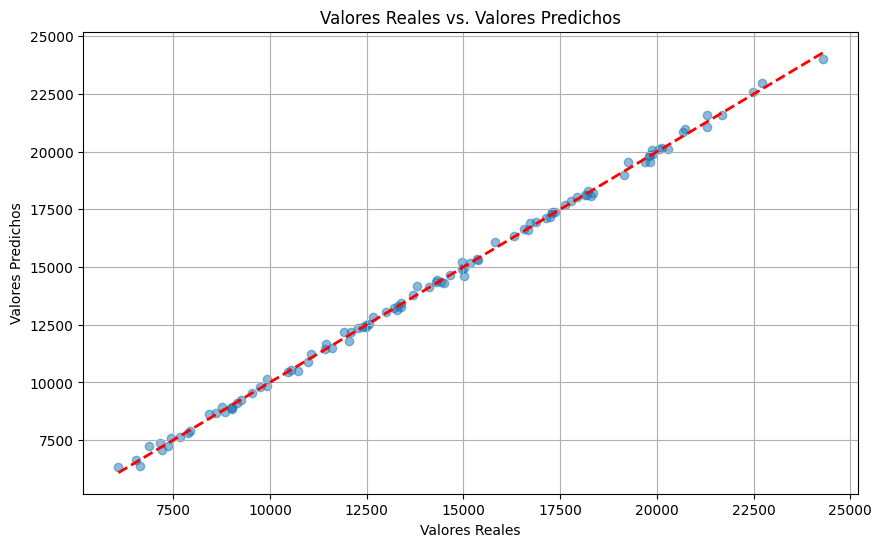

In [36]:
import matplotlib.pyplot as plt

# Graficar valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Línea de referencia ideal
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Valores Predichos")
plt.grid(True)
plt.show()

In [14]:
# Entrenar con todos los datos para ver los coeficientes generales
modelo.fit(X, y)

coeficientes = pd.DataFrame(
    modelo.coef_,
    index=X.columns,
    columns=['Coeficiente']
)
coeficientes['Importancia'] = coeficientes['Coeficiente'].abs()
print(coeficientes.sort_values(by='Importancia', ascending=False))

                    Coeficiente  Importancia
competencia         -120.230100   120.230100
gasto_publicidad      99.905256    99.905256
temp_media           -79.809183    79.809183
dias_hasta_navidad   -49.433285    49.433285
ventas_previas         1.536426     1.536426
